In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
dirTrain = "../../../Documents/ASL_Dataset/Train";
dirTeste = "../../../Documents/ASL_Dataset/Test";


In [3]:
Name=[]
for file in os.listdir(dirTrain):
    Name+=[file]

In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
dataset=[]
count=0
for file in os.listdir(dirTrain):
    path=os.path.join(dirTrain,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(30,30))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1


In [6]:
testeset=[]
count=0
for file in os.listdir(dirTeste):
    path=os.path.join(dirTeste,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(30,30))
        image=img_to_array(image)
        image=image/255.0
        testeset+=[[image,count]]
    count=count+1


In [7]:
data, labels0 = zip(*dataset)
teste, testlabels0 = zip(*testeset)

In [8]:
labels1 = to_categorical(labels0)
labels=np.array(labels1)

In [ ]:
print(data)

In [10]:
data=np.array(data)
test = np.array(teste)

In [11]:
print(data)

[[[[0.6392157  0.68235296 0.6509804 ]
   [0.64705884 0.6784314  0.6862745 ]
   [0.6666667  0.6666667  0.6666667 ]
   ...
   [0.6117647  0.62352943 0.54901963]
   [0.5647059  0.61960787 0.56078434]
   [0.58431375 0.6117647  0.54901963]]

  [[0.6509804  0.6745098  0.65882355]
   [0.6509804  0.67058825 0.64705884]
   [0.65882355 0.6666667  0.654902  ]
   ...
   [0.6156863  0.6156863  0.5764706 ]
   [0.6156863  0.60784316 0.5254902 ]
   [0.6        0.6039216  0.5411765 ]]

  [[0.64705884 0.67058825 0.6627451 ]
   [0.6392157  0.654902   0.6509804 ]
   [0.6627451  0.6745098  0.60784316]
   ...
   [0.6039216  0.6117647  0.56078434]
   [0.58431375 0.6156863  0.5568628 ]
   [0.5882353  0.6039216  0.5372549 ]]

  ...

  [[0.5568628  0.60784316 0.5372549 ]
   [0.54901963 0.5882353  0.5529412 ]
   [0.5568628  0.6039216  0.5647059 ]
   ...
   [0.49803922 0.52156866 0.52156866]
   [0.4862745  0.50980395 0.49411765]
   [0.52156866 0.4862745  0.49803922]]

  [[0.5411765  0.5921569  0.5568628 ]
   [0.5

In [12]:
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.2, random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)
print(f'First elements of y_train: {trainy[:10].T}\n')

In [ ]:
print(trainx[0])

In [14]:
num_classes = 28
input_shape = (40, 40, 3)

In [ ]:
print(f'Min-max values of X_train: {np.min(trainx),np.max(trainx)}\n')

In [24]:
model1 = tf.keras.Sequential([
    tf.keras.Input(input_shape),
    tf.keras.layers.Conv2D(filters=5, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 40, 40, 5)         245       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 20, 20, 5)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2000)              0         
                                                                 
 dense_5 (Dense)             (None, 28)                56028     
                                                                 
Total params: 56,273
Trainable params: 56,273
Non-trainable params: 0
_________________________________________________________________


In [29]:
batch_size = 128
epochs = 1
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
                            beta_1=0.9,
                            beta_2=0.999,
                            epsilon=1e-08)

# compile model
model1.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics = ['accuracy'])



In [30]:
# training
history = model1.fit(
    trainx,
    trainy,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(testx,testy)
)


 176/1036 [====>.........................] - ETA: 1:15 - loss: 0.0539 - accuracy: 0.9890

KeyboardInterrupt: 

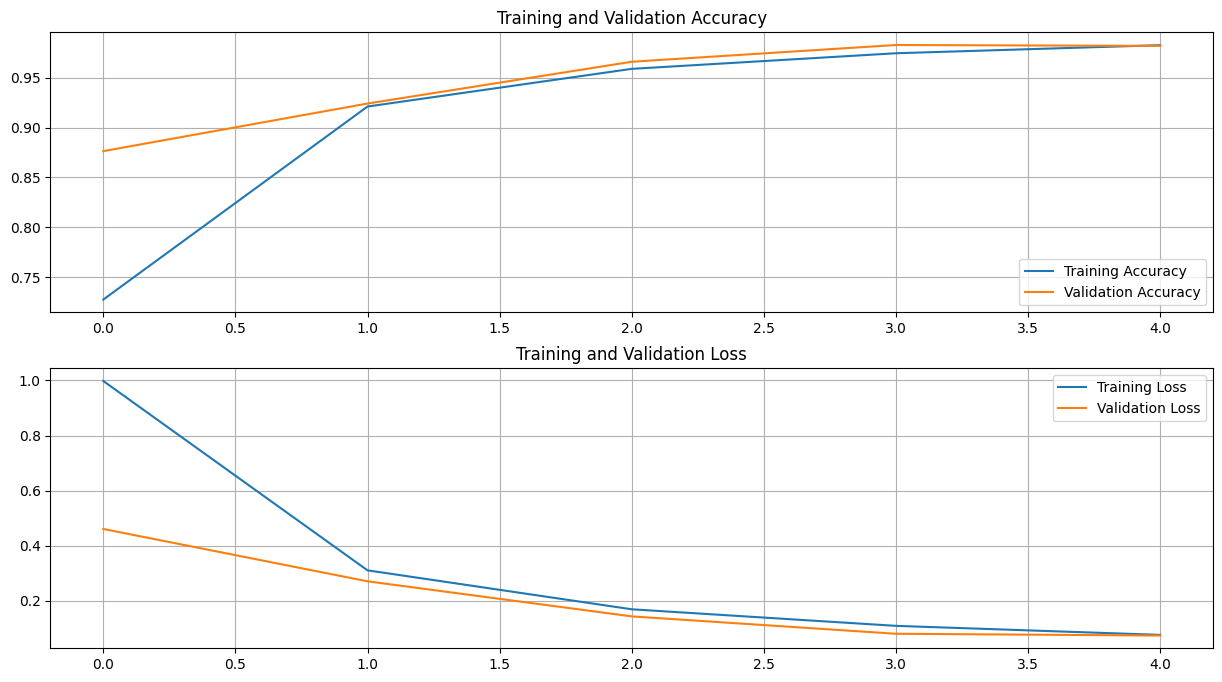

In [27]:
# verify training performance
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.grid(True)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.grid(True)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
score = model1.evaluate(testx, testy, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])